In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
from collections import deque
import time

file_name = "graph.txt"

with open(file_name, 'r') as file:
    data = file.readlines()

points = []
for line in data:
    components = line.strip().split(',')
    point = (float(components[0]), float(components[1]))
    points.append(point)


def bfs_shortest_path(graph, start, end):
    visited = set()
    queue = deque([(start, [start])])

    start_time = time.time()  

    while queue:
        current_node, path = queue.popleft()

        if current_node == end:
            end_time = time.time()  
            return path, end_time - start_time

        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                queue.append((neighbor, path + [neighbor]))


start_node = 5
end_node = 9

shortest_path_nodes, execution_time = bfs_shortest_path(G, start_node, end_node)

total_cost = 0
for i in range(len(shortest_path_nodes) - 1):
    total_cost += G[shortest_path_nodes[i]][shortest_path_nodes[i + 1]]['weight']

print(f"Start node: {start_node}")
print(f"End node: {end_node}")
print(f"Shortest path: {shortest_path_nodes}")
print(f"Total cost: {total_cost:.2f} km")
print(f"Total time: {execution_time:.6f} seconds")


Start node: 5
End node: 9
Shortest path: [5, 6, 7, 8, 9]
Total cost: 36794.89 km
Total time: 0.000028 seconds


Start node: 2
End node: 9
Shortest path: [2, 9]
Total cost: 10709.84 km
Total time: 0.000042 seconds


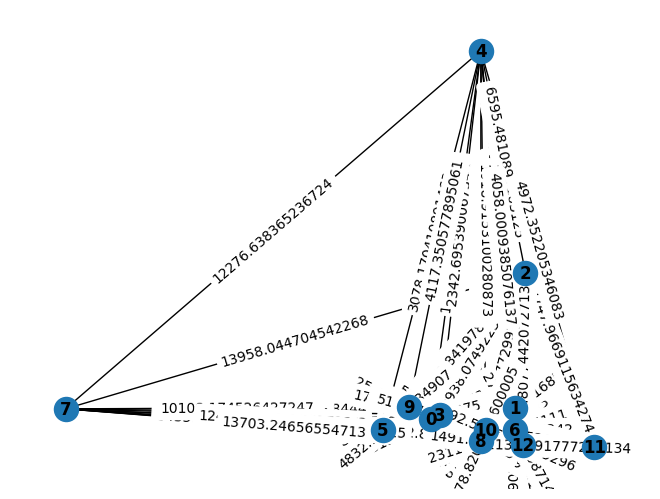

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
from collections import deque
import time

file_name = "graph.txt"

with open(file_name, 'r') as file:
    data = file.readlines()

points = []
for line in data:
    components = line.strip().split(',')
    point = (float(components[0]), float(components[1]))
    points.append(point)

# Create a graph and add nodes
G = nx.Graph()
for i, point in enumerate(points):
    G.add_node(i, pos=point)

# Add edges with weights (assuming weights are distances)
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        distance = geodesic(points[i], points[j]).km
        G.add_edge(i, j, weight=distance)

def bfs_shortest_path(graph, start, end):
    visited = set()
    queue = deque([(start, [start])])

    start_time = time.time()

    while queue:
        current_node, path = queue.popleft()

        if current_node == end:
            end_time = time.time()
            return path, end_time - start_time

        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                queue.append((neighbor, path + [neighbor]))

start_node = 2
end_node = 9

shortest_path_nodes, execution_time = bfs_shortest_path(G, start_node, end_node)

total_cost = 0
for i in range(len(shortest_path_nodes) - 1):
    total_cost += G[shortest_path_nodes[i]][shortest_path_nodes[i + 1]]['weight']

print(f"Start node: {start_node}")
print(f"End node: {end_node}")
print(f"Shortest path: {shortest_path_nodes}")
print(f"Total cost: {total_cost:.2f} km")
print(f"Total time: {execution_time:.6f} seconds")

# Plot the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


Start node: 5
End node: 9
Shortest path: [5, 9]
Total cost: 4832.20 km
Total time: 0.000085 seconds


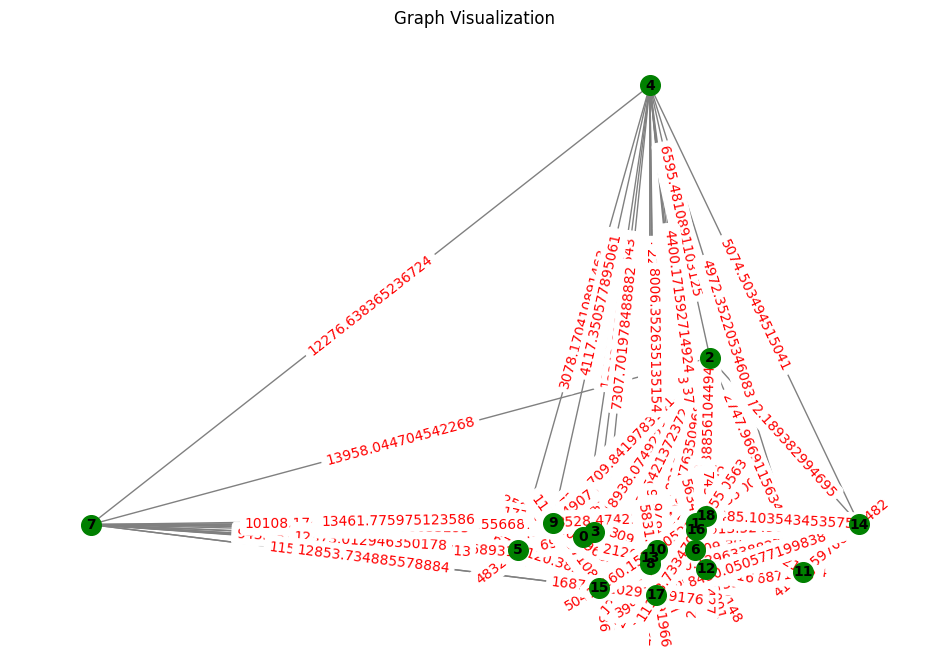

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
from geopy.distance import geodesic
from collections import deque
import time

file_name = "graph.txt"

with open(file_name, 'r') as file:
    data = file.readlines()

points = []
for line in data:
    components = line.strip().split(',')
    point = (float(components[0]), float(components[1]))
    points.append(point)


G = nx.Graph()
for i, point in enumerate(points):
    G.add_node(i, pos=point)


for i in range(len(points)):
    for j in range(i + 1, len(points)):
        distance = geodesic(points[i], points[j]).km
        G.add_edge(i, j, weight=distance)

def bfs_shortest_path(graph, start, end):
    visited = set()
    queue = deque([(start, [start])])

    start_time = time.time()

    while queue:
        current_node, path = queue.popleft()

        if current_node == end:
            end_time = time.time()
            return path, end_time - start_time

        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                queue.append((neighbor, path + [neighbor]))

start_node = 5
end_node = 9

shortest_path_nodes, execution_time = bfs_shortest_path(G, start_node, end_node)

total_cost = 0
for i in range(len(shortest_path_nodes) - 1):
    total_cost += G[shortest_path_nodes[i]][shortest_path_nodes[i + 1]]['weight']

print(f"Start node: {start_node}")
print(f"End node: {end_node}")
print(f"Shortest path: {shortest_path_nodes}")
print(f"Total cost: {total_cost:.2f} km")
print(f"Total time: {execution_time:.6f} seconds")


pos = nx.get_node_attributes(G, 'pos')
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=200, node_color='green')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

plt.title("Graph Visualization")
plt.axis('off')
plt.show()
